In [56]:
import numpy as np
import matplotlib.pyplot as plt

import numpy.typing as npt

In [3]:
T = 1.0 # 0 \leq t \leq T and k = T/M. k is the step size in time.
M = 4
k = T / M

In [4]:
k

0.25

In [12]:
y = np.zeros(M+1)
y[0] = 0.01 # Initial value

In [13]:
y

array([0.01, 0.  , 0.  , 0.  , 0.  ])

In [45]:
time = np.linspace(0, T, M+1)
time

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [49]:
assert time.size == y.size

# for i in range(M):
for i in range(len(time)-1): # Number of time steps: we subtract 1 because the first entry is the initial value.
    y[i+1] = y[i] + 10 * k * y[i] * (1.0 - y[i])
    print(f"step:{n} y[i+1]:{y[i+1]:5.3f} y[i]:{y[i]:5.3f}")

step:3 y[i+1]:0.035 y[i]:0.010
step:3 y[i+1]:0.119 y[i]:0.035
step:3 y[i+1]:0.380 y[i]:0.119
step:3 y[i+1]:0.969 y[i]:0.380


In [50]:
y

array([0.01      , 0.03475   , 0.11860609, 0.37995281, 0.9689245 ])

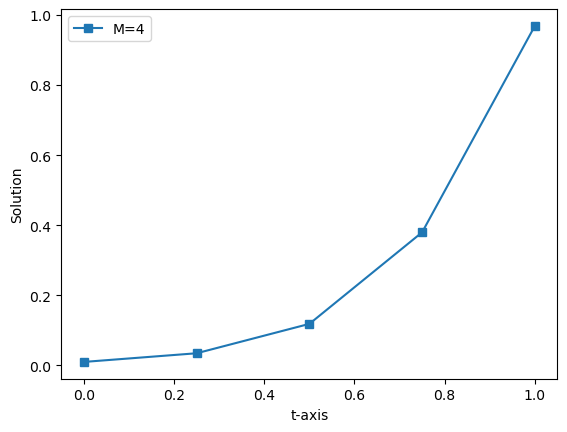

In [51]:
fig, ax = plt.subplots()

ax.set_ylabel("Solution")
ax.set_xlabel("t-axis")

ax.plot(time, y, color='tab:blue', marker="s", label="M=4")

ax.legend()

plt.show()

In [52]:
def logistic_eq_solution(y_0, l, t):
    """
    y_0: initial value -> y(t=0)
    l: lambda value -> dy/dt = lambda * y * (1-y)
    t: value of equation at the desired t
    """
    return y_0 / (y_0 + (1.0-y_0)*np.exp(-l*t))

logistic_solution_v = np.vectorize(logistic_eq_solution)

In [53]:
time_exact = np.linspace(0, T, 101)

In [54]:
y_exact = logistic_solution_v(0.01, 10, time_exact)
y_exact

array([0.01      , 0.0110401 , 0.01218705, 0.01345153, 0.01484523,
       0.01638095, 0.01807261, 0.01993543, 0.02198596, 0.02424219,
       0.02672363, 0.02945141, 0.03244833, 0.03573899, 0.03934979,
       0.04330901, 0.04764683, 0.05239533, 0.05758846, 0.06326194,
       0.06945316, 0.07620101, 0.08354559, 0.09152794, 0.10018958,
       0.10957205, 0.11971626, 0.13066181, 0.14244616, 0.15510372,
       0.16866479, 0.18315451, 0.19859166, 0.21498748, 0.23234451,
       0.2506554 , 0.269902  , 0.2900544 , 0.3110704 , 0.33289511,
       0.35546099, 0.37868821, 0.40248541, 0.42675091, 0.45137421,
       0.47623795, 0.50122004, 0.52619603, 0.55104162, 0.57563507,
       0.5998596 , 0.6236055 , 0.64677201, 0.66926887, 0.69101742,
       0.71195134, 0.73201699, 0.75117338, 0.7693918 , 0.78665516,
       0.80295715, 0.81830121, 0.83269935, 0.84617104, 0.85874195,
       0.87044287, 0.88130851, 0.8913766 , 0.90068689, 0.90928041,
       0.91719868, 0.92448323, 0.931175  , 0.937314  , 0.94293

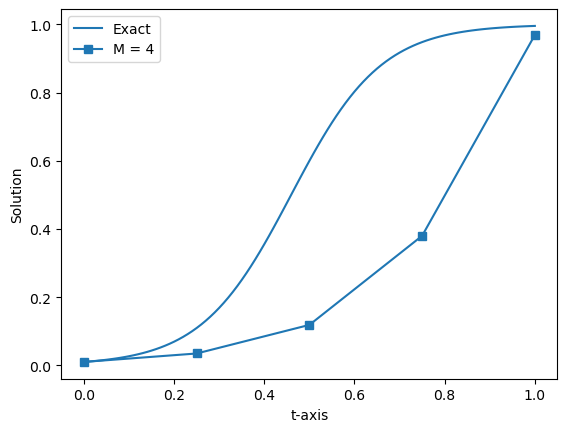

In [55]:
fig, ax = plt.subplots()

ax.set_ylabel("Solution")
ax.set_xlabel("t-axis")

ax.plot(time_exact, y_exact, label="Exact")
ax.plot(time, y, color='tab:blue', marker="s", label="M = 4")

ax.legend()
plt.show()

In [59]:
def forward_diff(T, M, y_0) -> tuple[npt.NDArray[np.float64], npt.NDArray[np.float64]]:
    """
    PARAMETERS
    ----------
    T: final time -> 0 < t < T
    M: number of time steps
    y_0: initial value -> y(t=0)

    RETURNS
    -------
    time, y: np.array[float64]
    """
    time = np.linspace(0, T, M+1)
    y = np.zeros(M+1)
    y[0] = y_0

    k = T / M
    for i in range(M):
        y[i+1] = y[i] + (10 * k * y[i] * (1.0 - y[i]))

    return time, y

In [61]:
time_4 = time.copy()
y_4 = y.copy()

In [63]:
time_16, y_16 = forward_diff(1, 16, 0.01)
time_64, y_64 = forward_diff(1, 64, 0.01)

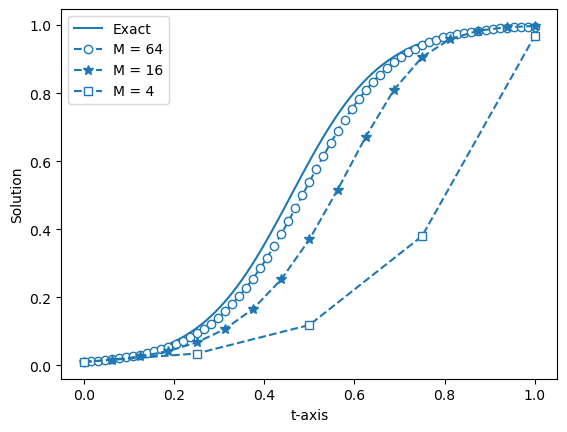

In [100]:
fig, ax = plt.subplots()

ax.set_ylabel("Solution")
ax.set_xlabel("t-axis")

# Markers https://matplotlib.org/stable/api/markers_api.html
ax.plot(time_exact, y_exact, label="Exact")
ax.plot(time_64, y_64, color='tab:blue', marker="o", linestyle="dashed", markerfacecolor="white", label="M = 64")
ax.plot(time_16, y_16, color='tab:blue', marker="*", linestyle="dashed", markersize=7, label="M = 16")
ax.plot(time_4, y_4, color='tab:blue', marker="s", linestyle="dashed", markerfacecolor="white", label="M = 4")

ax.legend()
plt.show()